In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [30]:
df = pd.read_csv('/Users/aleksandr_k/Desktop/startup_funding.csv')
print(df.shape)

(2372, 10)


In [31]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [27]:
df.Date.replace((['12/05.2015', '13/04.2015','15/01.2015','22/01//2015']),\
                         ('12/05/2015','13/04/2015','15/01/2015','22/01/2015'), inplace=True)

In [7]:
df.Date.replace((['12/05.2015', '13/04.2015','15/01.2015','22/01//2015']), \
                         ('12/05/2015','13/04/2015','15/01/2015','22/01/2015'), inplace=True)

df["year_month"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

y = df['year_month'].value_counts()


In [6]:
x = df['year_month'].value_counts().sort_values(ascending = False).head(10)
print("Топ 10 финансирований стартапов в зависимости от времени\n",x)

Топ 10 финансирований стартапов в зависимости от времени
 201601    104
201602    100
201606     98
201508     98
201507     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: year_month, dtype: int64


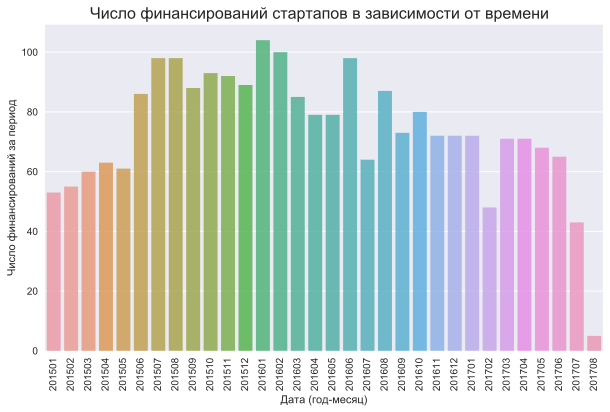

In [10]:
sns.barplot(y.index, y.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Дата (год-месяц)')
plt.ylabel('Число финансирований за период')
plt.title("Число финансирований стартапов в зависимости от времени  ", fontsize=16)
plt.show()

In [11]:
c = df['CityLocation'].value_counts().head(10)
print("Топ 10 финансирований стартапов в зависимости от локации \n",c)

Топ 10 финансирований стартапов в зависимости от локации 
 Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64


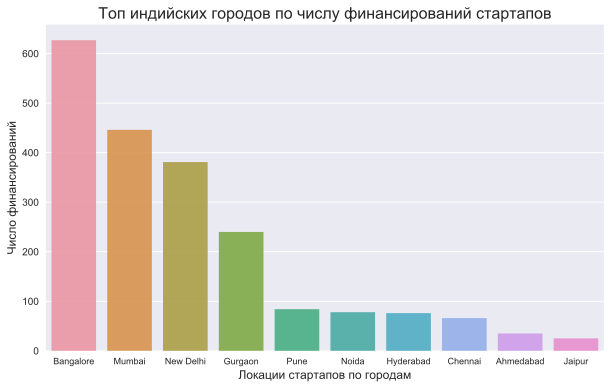

In [14]:
sns.barplot(c.index, c.values, alpha=0.8)
plt.xticks(rotation='horizontal', fontsize=9)
plt.xlabel('Локации стартапов по городам', fontsize=12)
plt.ylabel('Число финансирований', fontsize=12)
plt.title("Топ индийских городов по числу финансирований стартапов", fontsize=16)
plt.show()

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64


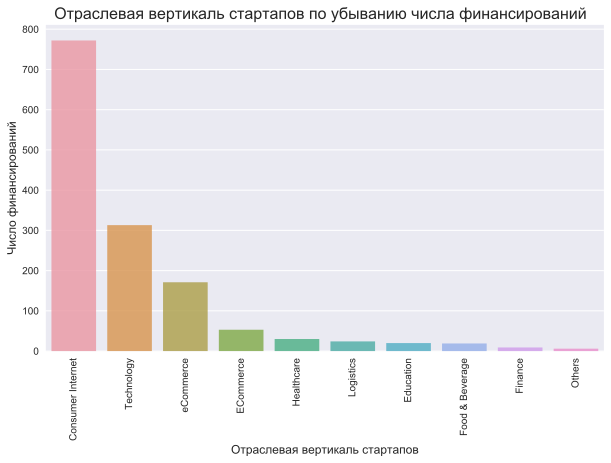

In [15]:
i = df['IndustryVertical'].value_counts().head(10)
print(i)

sns.barplot(i.index, i.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Отраслевая вертикаль стартапов', fontsize=12)
plt.ylabel('Число финансирований', fontsize=12)
plt.title("Отраслевая вертикаль стартапов по убыванию числа финансирований  ", fontsize=16)
plt.show()

Online Pharmacy               9
Food Delivery Platform        8
Online lending platform       5
Online Learning Platform      4
Fitness Mobile App            3
ECommerce Marketplace         3
Data Analytics platform       3
Online Payment Gateway        3
Online Tax Filing Platform    2
QSR Chain                     2
Name: SubVertical, dtype: int64


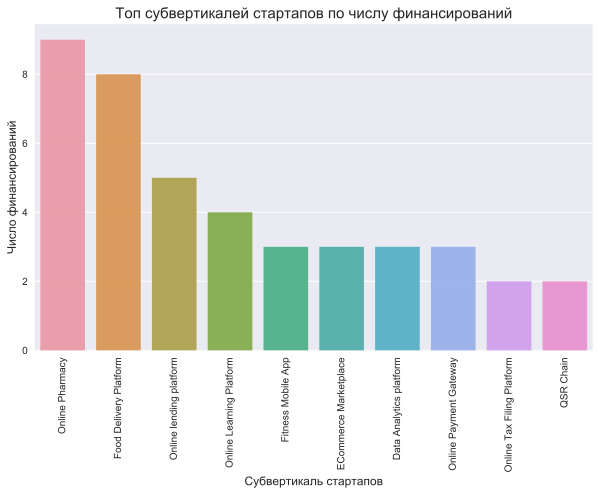

In [17]:
sub = df['SubVertical'].value_counts().head(10)
print(industry)
sns.barplot(sub.index, sub.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Субвертикаль стартапов', fontsize=12)
plt.ylabel('Число финансирований', fontsize=12)
plt.title("Топ субвертикалей стартапов по числу финансирований", fontsize=15)
plt.show()

In [19]:
invest = []
for i in df['InvestorsName']:
    for j in str(i).split(","):
        if j != "":
            invest.append(j.strip().lower().replace(" ","_"))


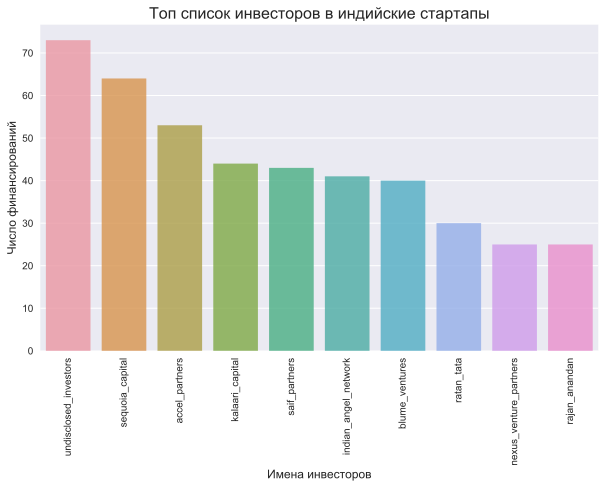

In [20]:
a = pd.Series(invest).value_counts()[:10]
#plt.figure(figsize=(12,6))
sns.barplot(a.index, a.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Имена инвесторов', fontsize=12)
plt.ylabel('Число финансирований', fontsize=12)
plt.title("Топ список инвесторов в индийские стартапы", fontsize=16)
plt.show()

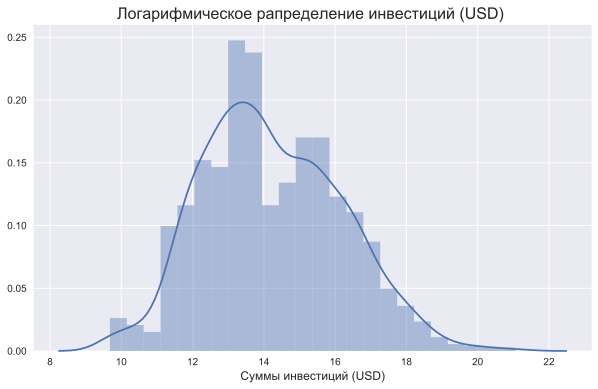

In [21]:
df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df['AmountInUSD_log'] = np.log(df["AmountInUSD"])
sns.distplot(df['AmountInUSD_log'].dropna())
plt.xlabel('Суммы инвестиций (USD)', fontsize=12)
plt.title("Логарифмическое рапределение инвестиций (USD) ", fontsize=16)
plt.show()

In [25]:
b = df.InvestmentType.value_counts()
print("Сферы инвестирования \n",b)

Сферы инвестирования 
 Seed Funding      1271
Private Equity    1066
SeedFunding         30
Crowd Funding        1
Debt Funding         1
PrivateEquity        1
Crowd funding        1
Name: InvestmentType, dtype: int64
